In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout,Conv2D,MaxPooling2D,Add
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import numpy as np
# Load and preprocess the MNIST dataset
import matplotlib.pyplot as plt

In [2]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x = train_x.reshape(-1, 28, 28, 1)  # Reshape for CNN (add a channel dimension)
test_x = test_x.reshape(-1, 28, 28, 1)

train_x = train_x.astype('float32') / 255  # Normalize pixel values
test_x = test_x.astype('float32') / 255

train_y = tf.keras.utils.to_categorical(train_y, 10)  # One-hot encoding of labels
test_y = tf.keras.utils.to_categorical(test_y, 10)

from sklearn.model_selection import train_test_split
test_x, valid_x, test_y, valid_y = train_test_split( test_x, test_y, test_size=0.5, random_state=0)

test_y.shape

(5000, 10)

In [3]:
from tensorflow.keras.layers import Input
def RESNet():
    input_ = Input(shape=(28,28,1))
    model = Conv2D(filters=32,kernel_size=2,use_bias=True,activation='relu')(input_)
    model = MaxPooling2D(pool_size=(2,2),strides=None,padding='same')(model)
    model1 = Conv2D(filters=32,kernel_size=2,use_bias=True,activation='relu')(model)
    model = MaxPooling2D(pool_size=(2,2),strides=None,padding='same')(model1)
    model = Conv2D(filters=16,kernel_size=2,use_bias=True,activation='relu')(model)
    model = MaxPooling2D(pool_size=(2,2),strides=None,padding='same')(model)
    model = Conv2D(filters=8,kernel_size=1,use_bias=True,activation='relu')(model)
    model = MaxPooling2D(pool_size=(1,1),strides=None,padding='same')(model)
    model = Conv2D(filters=8,kernel_size=1,use_bias=True,activation='relu')(model)
    model = MaxPooling2D(pool_size=(1,1),strides=None,padding='same')(model)
    model1 = MaxPooling2D(pool_size=(2,2),strides=None,padding='same')(model1)
    model1 = Conv2D(filters=8,kernel_size=5,use_bias=True,activation='relu')(model1)
    model = Add()([model,model1])
    model = Flatten()(model)
    op = Dense(10,activation='sigmoid')(model)
    model = Model(inputs=[input_],outputs=[op])
    return model

In [4]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [5]:
model = RESNet()
rate = 0.1
adam = Adam(learning_rate=rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
history = model.fit(train_x, train_y, epochs=5, batch_size=128, validation_data=(valid_x, valid_y))

Epoch 1/5
469/469 [==============================] - 41s 81ms/step - loss: 2.3680 - accuracy: 0.1026 - f1_m: 0.1782 - precision_m: 0.1008 - recall_m: 0.7809 - val_loss: 2.3057 - val_accuracy: 0.1052 - val_f1_m: 0.1754 - val_precision_m: 0.1023 - val_recall_m: 0.6139
Epoch 2/5
469/469 [==============================] - 38s 81ms/step - loss: 2.3075 - accuracy: 0.1042 - f1_m: 0.1774 - precision_m: 0.1004 - recall_m: 0.7690 - val_loss: 2.3104 - val_accuracy: 0.0912 - val_f1_m: 0.1757 - val_precision_m: 0.1004 - val_recall_m: 0.7027
Epoch 3/5
469/469 [==============================] - 39s 82ms/step - loss: 2.3074 - accuracy: 0.1022 - f1_m: 0.1779 - precision_m: 0.1007 - recall_m: 0.7715 - val_loss: 2.3068 - val_accuracy: 0.0992 - val_f1_m: 0.1780 - val_precision_m: 0.1001 - val_recall_m: 0.8008
Epoch 4/5
469/469 [==============================] - 38s 81ms/step - loss: 2.3072 - accuracy: 0.1058 - f1_m: 0.1777 - precision_m: 0.1005 - recall_m: 0.7757 - val_loss: 2.3088 - val_accuracy: 0.1052 

In [85]:
test_loss, test_accuracy, test_f1, test_precision, test_recall= model.evaluate(test_x, test_y)

print('Test Loss: ',test_loss,'\nTest Accuracy: ',test_accuracy,'\nF1 Score: ',
      test_f1,'\nPrecision Score: ',test_precision,'Recall Score: ',test_recall)

157/157 [==============================] - 1s 8ms/step - loss: 2.3055 - accuracy: 0.1022 - f1_m: 0.1753 - precision_m: 0.1023 - recall_m: 0.6137
Test Loss:  2.305546760559082 
Test Accuracy:  0.10220000147819519 
F1 Score:  0.17532983422279358 
Precision Score:  0.10227575153112411 Recall Score:  0.6136544346809387


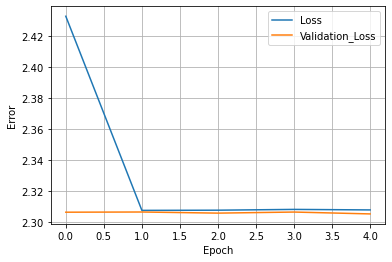

In [86]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation_Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

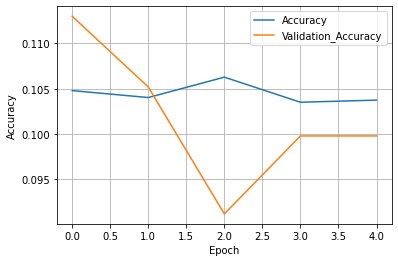

In [87]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  

C:\Users\rithv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rithv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rithv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


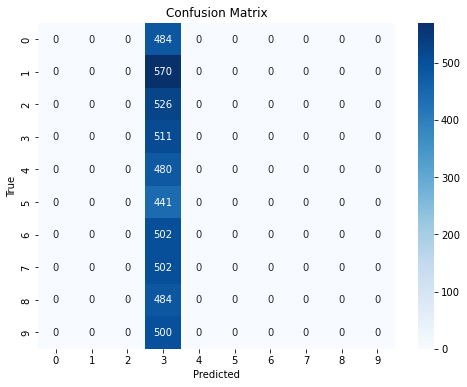

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       484
           1       0.00      0.00      0.00       570
           2       0.00      0.00      0.00       526
           3       0.10      1.00      0.19       511
           4       0.00      0.00      0.00       480
           5       0.00      0.00      0.00       441
           6       0.00      0.00      0.00       502
           7       0.00      0.00      0.00       502
           8       0.00      0.00      0.00       484
           9       0.00      0.00      0.00       500

    accuracy                           0.10      5000
   macro avg       0.01      0.10      0.02      5000
weighted avg       0.01      0.10      0.02      5000



In [88]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Assuming you have your trained model 'model' and test data 'test_images'

# Make predictions on the test data
predictions = model.predict(test_x)
predicted_labels = np.argmax(predictions, axis=1)  # Convert one-hot encoded labels to class labels

# True labels
true_labels = np.argmax(test_y, axis=1)

# Create a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a classification report
class_report = classification_report(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n", class_report)


In [6]:
model = RESNet()
rate = 0.01
adam = Adam(learning_rate=rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
history = model.fit(train_x, train_y, epochs=5, batch_size=128, validation_data=(valid_x, valid_y))

Epoch 1/5
469/469 [==============================] - 41s 83ms/step - loss: 0.1922 - accuracy: 0.9390 - f1_m: 0.4105 - precision_m: 0.2592 - recall_m: 0.9953 - val_loss: 0.0678 - val_accuracy: 0.9792 - val_f1_m: 0.4117 - val_precision_m: 0.2593 - val_recall_m: 0.9992
Epoch 2/5
469/469 [==============================] - 38s 81ms/step - loss: 0.0737 - accuracy: 0.9771 - f1_m: 0.4516 - precision_m: 0.2919 - recall_m: 0.9991 - val_loss: 0.0481 - val_accuracy: 0.9850 - val_f1_m: 0.4393 - val_precision_m: 0.2816 - val_recall_m: 0.9996
Epoch 3/5
469/469 [==============================] - 38s 81ms/step - loss: 0.0596 - accuracy: 0.9817 - f1_m: 0.4709 - precision_m: 0.3082 - recall_m: 0.9994 - val_loss: 0.0537 - val_accuracy: 0.9846 - val_f1_m: 0.4696 - val_precision_m: 0.3069 - val_recall_m: 0.9996
Epoch 4/5
469/469 [==============================] - 38s 81ms/step - loss: 0.0565 - accuracy: 0.9829 - f1_m: 0.4747 - precision_m: 0.3114 - recall_m: 0.9996 - val_loss: 0.0548 - val_accuracy: 0.9826 

In [7]:
test_loss, test_accuracy, test_f1, test_precision, test_recall= model.evaluate(test_x, test_y)

print('Test Loss: ',test_loss,'\nTest Accuracy: ',test_accuracy,'\nF1 Score: ',
      test_f1,'\nPrecision Score: ',test_precision,'Recall Score: ',test_recall)

157/157 [==============================] - 2s 11ms/step - loss: 0.0529 - accuracy: 0.9824 - f1_m: 0.4942 - precision_m: 0.3285 - recall_m: 0.9994
Test Loss:  0.05288318917155266 
Test Accuracy:  0.9824000000953674 
F1 Score:  0.4941581189632416 
Precision Score:  0.32850515842437744 Recall Score:  0.9994028806686401


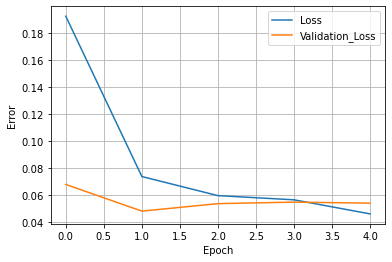

In [8]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation_Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

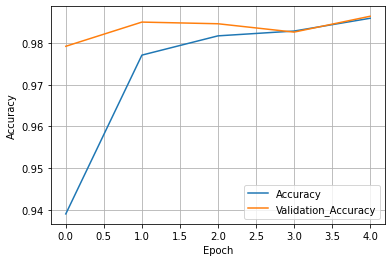

In [9]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  

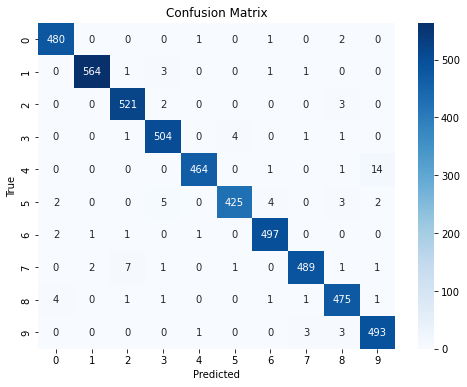

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       484
           1       0.99      0.99      0.99       570
           2       0.98      0.99      0.98       526
           3       0.98      0.99      0.98       511
           4       0.99      0.97      0.98       480
           5       0.99      0.96      0.98       441
           6       0.98      0.99      0.99       502
           7       0.99      0.97      0.98       502
           8       0.97      0.98      0.98       484
           9       0.96      0.99      0.98       500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



In [10]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Assuming you have your trained model 'model' and test data 'test_images'

# Make predictions on the test data
predictions = model.predict(test_x)
predicted_labels = np.argmax(predictions, axis=1)  # Convert one-hot encoded labels to class labels

# True labels
true_labels = np.argmax(test_y, axis=1)

# Create a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a classification report
class_report = classification_report(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n", class_report)


In [11]:
model.get_weights()

[array([[[[ 0.47352332,  0.39854145, -0.18973978,  0.04420232,
            0.5833061 , -0.08873875,  0.22543669, -0.07978652,
            0.35843244, -0.05054361, -0.08933786,  0.11885422,
           -0.17154315, -0.10360102,  0.03725841,  0.3608422 ,
           -0.74430066, -0.35523033, -0.28517467, -0.3958249 ,
           -0.02089139, -0.7200639 ,  0.09539716, -0.05998014,
            0.11667185, -0.6879089 ,  0.365117  , -0.11246409,
            0.10835566, -0.14500248,  0.07692363, -0.80426586]],
 
         [[-0.05932852, -0.48531806,  0.19104844,  0.24036019,
           -0.6341352 , -0.10672159,  0.08541566, -0.46318957,
           -0.39439452,  0.05869051, -0.26854736, -0.23351793,
            0.24801062,  0.49612877, -0.7237103 ,  0.41164243,
           -0.3047482 ,  0.6469025 ,  0.3881112 ,  0.42777792,
           -0.09010172, -1.1286768 , -0.09557223, -0.14993563,
            0.31754684, -0.8737672 , -0.6730878 ,  0.1886636 ,
           -0.21887924,  0.15935303,  0.09207866,  

In [94]:
model = RESNet()
rate = 0.001
adam = Adam(learning_rate=rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
history = model.fit(train_x, train_y, epochs=5, batch_size=128, validation_data=(valid_x, valid_y))

Epoch 1/5
469/469 [==============================] - 21s 43ms/step - loss: 0.4535 - accuracy: 0.8615 - f1_m: 0.3985 - precision_m: 0.2508 - recall_m: 0.9828 - val_loss: 0.1376 - val_accuracy: 0.9622 - val_f1_m: 0.4480 - val_precision_m: 0.2890 - val_recall_m: 0.9967
Epoch 2/5
469/469 [==============================] - 20s 42ms/step - loss: 0.1133 - accuracy: 0.9656 - f1_m: 0.4653 - precision_m: 0.3035 - recall_m: 0.9978 - val_loss: 0.0823 - val_accuracy: 0.9748 - val_f1_m: 0.4746 - val_precision_m: 0.3114 - val_recall_m: 0.9990
Epoch 3/5
469/469 [==============================] - 20s 42ms/step - loss: 0.0807 - accuracy: 0.9756 - f1_m: 0.4788 - precision_m: 0.3150 - recall_m: 0.9986 - val_loss: 0.0603 - val_accuracy: 0.9820 - val_f1_m: 0.4954 - val_precision_m: 0.3294 - val_recall_m: 0.9994
Epoch 4/5
469/469 [==============================] - 20s 43ms/step - loss: 0.0666 - accuracy: 0.9795 - f1_m: 0.4870 - precision_m: 0.3221 - recall_m: 0.9989 - val_loss: 0.0533 - val_accuracy: 0.9836 

In [95]:
test_loss, test_accuracy, test_f1, test_precision, test_recall= model.evaluate(test_x, test_y)

print('Test Loss: ',test_loss,'\nTest Accuracy: ',test_accuracy,'\nF1 Score: ',
      test_f1,'\nPrecision Score: ',test_precision,'Recall Score: ',test_recall)

157/157 [==============================] - 1s 8ms/step - loss: 0.0566 - accuracy: 0.9810 - f1_m: 0.4942 - precision_m: 0.3286 - recall_m: 0.9996
Test Loss:  0.05658046901226044 
Test Accuracy:  0.9810000061988831 
F1 Score:  0.494175523519516 
Precision Score:  0.3285757899284363 Recall Score:  0.9996019005775452


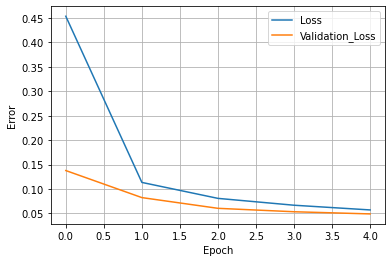

In [96]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation_Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

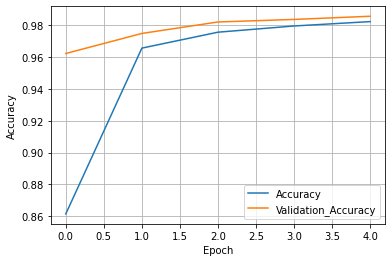

In [97]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  

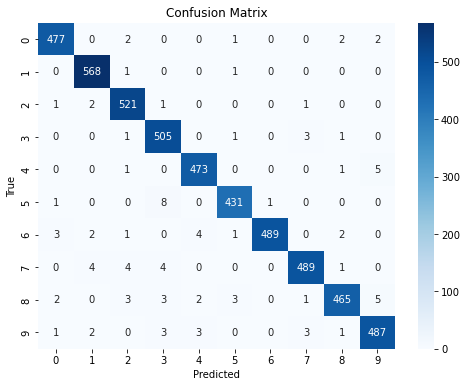

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       484
           1       0.98      1.00      0.99       570
           2       0.98      0.99      0.98       526
           3       0.96      0.99      0.98       511
           4       0.98      0.99      0.98       480
           5       0.98      0.98      0.98       441
           6       1.00      0.97      0.99       502
           7       0.98      0.97      0.98       502
           8       0.98      0.96      0.97       484
           9       0.98      0.97      0.97       500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



In [98]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Assuming you have your trained model 'model' and test data 'test_images'

# Make predictions on the test data
predictions = model.predict(test_x)
predicted_labels = np.argmax(predictions, axis=1)  # Convert one-hot encoded labels to class labels

# True labels
true_labels = np.argmax(test_y, axis=1)

# Create a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a classification report
class_report = classification_report(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n", class_report)


In [99]:
model = RESNet()
rate = 0.0001
adam = Adam(learning_rate=rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
history = model.fit(train_x, train_y, epochs=5, batch_size=128, validation_data=(valid_x, valid_y))

Epoch 1/5
469/469 [==============================] - 22s 45ms/step - loss: 1.4713 - accuracy: 0.6053 - f1_m: 0.3593 - precision_m: 0.2264 - recall_m: 0.8740 - val_loss: 0.6212 - val_accuracy: 0.8188 - val_f1_m: 0.4314 - val_precision_m: 0.2775 - val_recall_m: 0.9686
Epoch 2/5
469/469 [==============================] - 21s 44ms/step - loss: 0.5007 - accuracy: 0.8531 - f1_m: 0.4599 - precision_m: 0.3017 - recall_m: 0.9693 - val_loss: 0.3854 - val_accuracy: 0.8864 - val_f1_m: 0.4759 - val_precision_m: 0.3149 - val_recall_m: 0.9752
Epoch 3/5
469/469 [==============================] - 21s 45ms/step - loss: 0.3583 - accuracy: 0.8951 - f1_m: 0.4844 - precision_m: 0.3224 - recall_m: 0.9744 - val_loss: 0.2978 - val_accuracy: 0.9166 - val_f1_m: 0.4885 - val_precision_m: 0.3255 - val_recall_m: 0.9791
Epoch 4/5
469/469 [==============================] - 21s 45ms/step - loss: 0.2902 - accuracy: 0.9151 - f1_m: 0.4896 - precision_m: 0.3266 - recall_m: 0.9779 - val_loss: 0.2461 - val_accuracy: 0.9312 

In [100]:
test_loss, test_accuracy, test_f1, test_precision, test_recall= model.evaluate(test_x, test_y)

print('Test Loss: ',test_loss,'\nTest Accuracy: ',test_accuracy,'\nF1 Score: ',
      test_f1,'\nPrecision Score: ',test_precision,'Recall Score: ',test_recall)

157/157 [==============================] - 1s 8ms/step - loss: 0.2166 - accuracy: 0.9380 - f1_m: 0.5002 - precision_m: 0.3353 - recall_m: 0.9879
Test Loss:  0.21664685010910034 
Test Accuracy:  0.9380000233650208 
F1 Score:  0.5002211928367615 
Precision Score:  0.3353337049484253 Recall Score:  0.9878582954406738


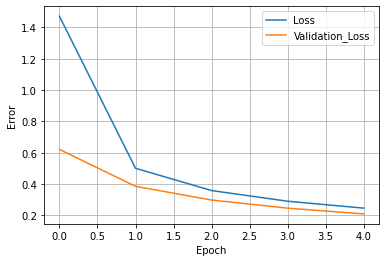

In [101]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation_Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

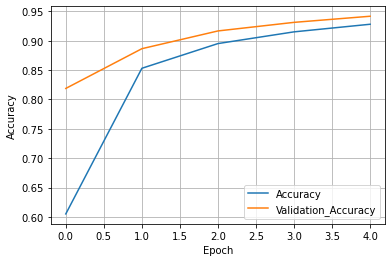

In [102]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True) 

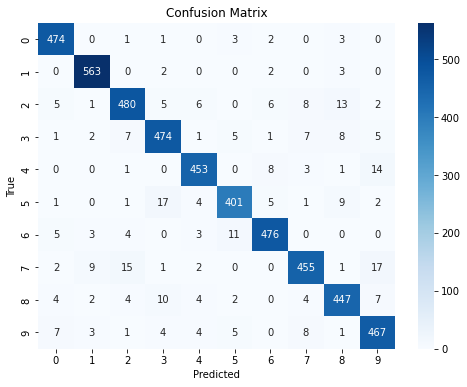

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       484
           1       0.97      0.99      0.98       570
           2       0.93      0.91      0.92       526
           3       0.92      0.93      0.92       511
           4       0.95      0.94      0.95       480
           5       0.94      0.91      0.92       441
           6       0.95      0.95      0.95       502
           7       0.94      0.91      0.92       502
           8       0.92      0.92      0.92       484
           9       0.91      0.93      0.92       500

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



In [103]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Assuming you have your trained model 'model' and test data 'test_images'

# Make predictions on the test data
predictions = model.predict(test_x)
predicted_labels = np.argmax(predictions, axis=1)  # Convert one-hot encoded labels to class labels

# True labels
true_labels = np.argmax(test_y, axis=1)

# Create a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a classification report
class_report = classification_report(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n", class_report)
